In [1]:
import numpy as np

In [2]:
# decompose a tridiagonal matrix into its LU decomposition (A=LU)
def decomp_LU_tridiag(A):
    Ls = []
    Us = []
    n = A.shape[0]

    ds = A.diagonal()
    es = A.diagonal(-1)
    fs = A.diagonal(1)

    # first l1, u1 = f1/l1 (in python start with 0)
    Ls.append(ds[0])
    Us.append(fs[0]/Ls[0])
    for i in range(1, n-1): # i=2~n-1  (in python i=1~n-2)
        Ls.append(ds[i]-es[i]*Us[i-1])
        Us.append(fs[i]/Ls[i])
    Ls.append(ds[n-1] - es[n-2] * Us[n-2])
    Us = np.insert(Us,0,0.0) # necessary for spdiags

    Ls = np.array(Ls)
    Us = np.array(Us)

    es = np.insert(es, len(es), 0.0) #necessary for spdiags

    #array Ls to diagonal matrix L
    diags_forL = np.array([Ls, es])
    positions_of_diags_forL = np.array([0, -1])
    L = spdiags(diags_forL, positions_of_diags_forL, n, n)

    #array Us to diagonal matrix U
    diags_forU = np.array([Us, np.ones(n)])
    positions_of_diags_forU = np.array([1, 0])
    U = spdiags(diags_forU, positions_of_diags_forU, n, n)

    return L, U

#solve AX=b where A is a triadiagonal matrix 
def solve_tridiag_LU(A,b):
    L, U = decomp_LU_tridiag(A)

    Ls = L.diagonal()
    Us = U.diagonal(1)
    es = L.diagonal(-1)

    y = [b[0]/Ls[0]]
    n=len(b)
    for i in range(1,n):
        y.append((b[i]-es[i-1]*y[i-1])/Ls[i])
    y = np.array(y)

    x = [y[len(y)-1]]
    count = 0
    for i in range(n-2,-1,-1):
        x.append(y[i] - Us[i]*x[count])
        count += 1
    return np.array(x[::-1])

In [3]:
#store matrix A as a tridiagonal matrix
d = np.float64(np.arange(1001,1101)) #principal diagonal elements, d_i
off_diag = np.float64(np.arange(2,103))
es = off_diag[1:]
fs = off_diag[:len(off_diag)-1]

from scipy.sparse import spdiags
diagonal_elements = np.array([d, es, fs])
diagonal_positions = np.array([0,-1,1])
A = spdiags(diagonal_elements, diagonal_positions, 100, 100)
print(A.toarray())
type(A)

[[1001.    3.    0. ...    0.    0.    0.]
 [   3. 1002.    4. ...    0.    0.    0.]
 [   0.    4. 1003. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... 1098.  100.    0.]
 [   0.    0.    0. ...  100. 1099.  101.]
 [   0.    0.    0. ...    0.  101. 1100.]]


scipy.sparse.dia.dia_matrix

In [4]:
# Solve Ax=b
b = np.float64(np.arange(2, 102))
print(b)
solution = solve_tridiag_LU(A,b)
np_solution = np.linalg.solve(A.toarray(),b)

[  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101.]


In [5]:
solution

array([0.00198909, 0.00297229, 0.00395165, 0.00492521, 0.00589303,
       0.00685517, 0.00781168, 0.00876259, 0.00970797, 0.01064786,
       0.01158231, 0.01251136, 0.01343507, 0.01435347, 0.01526662,
       0.01617455, 0.01707732, 0.01797497, 0.01886753, 0.01975506,
       0.0206376 , 0.02151518, 0.02238785, 0.02325565, 0.02411863,
       0.02497681, 0.02583025, 0.02667897, 0.02752303, 0.02836245,
       0.02919728, 0.03002756, 0.03085331, 0.03167458, 0.03249141,
       0.03330382, 0.03411186, 0.03491556, 0.03571496, 0.03651009,
       0.03730098, 0.03808766, 0.03887018, 0.03964857, 0.04042285,
       0.04119306, 0.04195923, 0.0427214 , 0.04347958, 0.04423383,
       0.04498416, 0.04573061, 0.0464732 , 0.04721197, 0.04794695,
       0.04867816, 0.04940563, 0.0501294 , 0.05084949, 0.05156592,
       0.05227874, 0.05298795, 0.0536936 , 0.05439571, 0.0550943 ,
       0.0557894 , 0.05648103, 0.05716923, 0.05785402, 0.05853542,
       0.05921346, 0.05988816, 0.06055955, 0.06122766, 0.06189

In [6]:
np_solution

array([0.00198909, 0.00297228, 0.00395163, 0.00492518, 0.005893  ,
       0.00685513, 0.00781162, 0.00876252, 0.00970788, 0.01064775,
       0.01158218, 0.01251121, 0.01343489, 0.01435327, 0.01526639,
       0.0161743 , 0.01707703, 0.01797465, 0.01886718, 0.01975468,
       0.02063718, 0.02151472, 0.02238736, 0.02325512, 0.02411806,
       0.0249762 , 0.0258296 , 0.02667828, 0.02752229, 0.02836167,
       0.02919646, 0.03002668, 0.03085239, 0.03167361, 0.03249038,
       0.03330275, 0.03411074, 0.03491439, 0.03571373, 0.0365088 ,
       0.03729964, 0.03808627, 0.03886873, 0.03964706, 0.04042128,
       0.04119143, 0.04195754, 0.04271965, 0.04347778, 0.04423196,
       0.04498223, 0.04572861, 0.04647114, 0.04720985, 0.04794476,
       0.04867591, 0.04940331, 0.05012702, 0.05084704, 0.05156341,
       0.05227615, 0.0529853 , 0.05369088, 0.05439291, 0.05509143,
       0.05578646, 0.05647803, 0.05716616, 0.05785087, 0.0585322 ,
       0.05921017, 0.0598848 , 0.06055612, 0.06122415, 0.06188

In [7]:
np.allclose(solution,np_solution, rtol=1e-04)

True

Text(0, 0.5, '$x_{i}$')

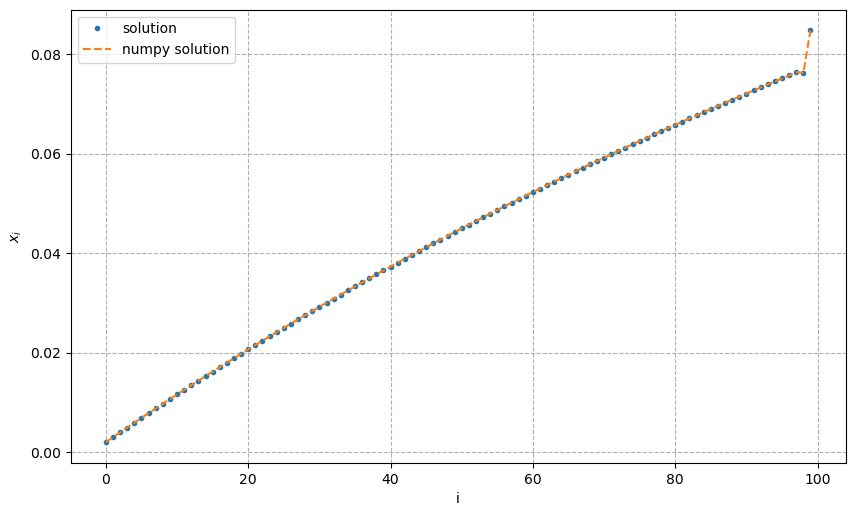

In [8]:
# visualisation of solution compared to numpy's linalg.solve() function
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 

fig = plt.figure()
ax = plt.axes()
plt.grid(ls='--')
plt.plot(solution,'.',label='solution')
plt.plot(np_solution, '--',label = 'numpy solution')
plt.legend()
ax.set_xlabel("i")
ax.set_ylabel("$x_{i}$")